<a href="https://colab.research.google.com/github/Dconsultstech/Machine-Learning-Projects/blob/main/Dog_vs_Cat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Importing the dependencies

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.image as mpimage

from tensorflow import keras


In [2]:
### Downloading the cat vs Dog dataset for the convolutional neural network.
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-06-21 10:25:49--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  18.1MB/s    in 4.6s    

2024-06-21 10:25:54 (14.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
#### Unziping the cat vs dog dataset.
import os
import zipfile

In [6]:
### Unzipping the dog vs cat image dataset.

zip_dir = zipfile.ZipFile('/content/cats_and_dogs_filtered.zip','r')
zip_dir.extractall('/cats_and_dogs_filtered')
zip_dir.close()

In [9]:
#### specifying each train and validation path using the os.

train_dir = "/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train"

valid_dir = "/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation"

train_dog_dir = os.path.join(train_dir,'dogs')
train_cat_dir = os.path.join(train_dir,'cats')

#### Validation dogs and cats paths

valid_dog_dir = os.path.join(valid_dir,'dogs')
valid_cat_dir = os.path.join(valid_dir,'cats')

#### Printing the list of each dog and cats for the training and validation image set.

train_dog_names = os.listdir(train_dog_dir)
train_cat_names = os.listdir(train_cat_dir)

valid_dog_names = os.listdir(valid_dog_dir)
valid_cat_names = os.listdir(valid_cat_dir)

print(f"The training Dogs image are showned as: {train_dog_names[:10]}")
print(f"The training cat image are showned as: {train_cat_names[:10]}")

print('-------------------------------------------------------------------------')
print('The Validation image names for dogs and Cat')
print('-------------------------------------------------------------------------')

print(f"The validation Dogs image are showned as: {valid_dog_names[:10]}")
print(f"The validation cat image are showned as: {valid_cat_names[:10]}")

The training Dogs image are showned as: ['dog.999.jpg', 'dog.475.jpg', 'dog.628.jpg', 'dog.858.jpg', 'dog.518.jpg', 'dog.921.jpg', 'dog.731.jpg', 'dog.620.jpg', 'dog.131.jpg', 'dog.560.jpg']
The training cat image are showned as: ['cat.872.jpg', 'cat.967.jpg', 'cat.339.jpg', 'cat.730.jpg', 'cat.346.jpg', 'cat.542.jpg', 'cat.575.jpg', 'cat.267.jpg', 'cat.225.jpg', 'cat.901.jpg']
-------------------------------------------------------------------------
The Validation image names for dogs and Cat
-------------------------------------------------------------------------
The validation Dogs image are showned as: ['dog.2279.jpg', 'dog.2343.jpg', 'dog.2233.jpg', 'dog.2182.jpg', 'dog.2033.jpg', 'dog.2280.jpg', 'dog.2051.jpg', 'dog.2260.jpg', 'dog.2254.jpg', 'dog.2137.jpg']
The validation cat image are showned as: ['cat.2449.jpg', 'cat.2458.jpg', 'cat.2340.jpg', 'cat.2167.jpg', 'cat.2408.jpg', 'cat.2325.jpg', 'cat.2303.jpg', 'cat.2103.jpg', 'cat.2114.jpg', 'cat.2111.jpg']


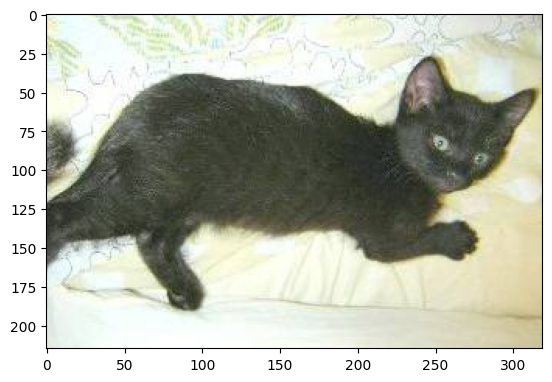

In [15]:
cat_path = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.967.jpg'
img = mpimage.imread(cat_path)

plt.imshow(img);

In [14]:
img.shape

(374, 500, 3)

In [18]:
### Printing the total numbers of training images for dog and cats. Aswell as for the validation images

print(f"The Total number of training images for dog is :{len(os.listdir(train_dog_dir))}")

print(f"The Total number of training images for cat is :{len(os.listdir(train_cat_dir))}")
print("----------------------------------------------------------------------------------")

print(f"The Total number of validation images for dog is :{len(os.listdir(valid_dog_dir))}")

print(f"The Total number of validation images for cat is :{len(os.listdir(valid_cat_dir))}")

The Total number of training images for dog is :1000
The Total number of training images for cat is :1000
----------------------------------------------------------------------------------
The Total number of validation images for dog is :500
The Total number of validation images for cat is :500


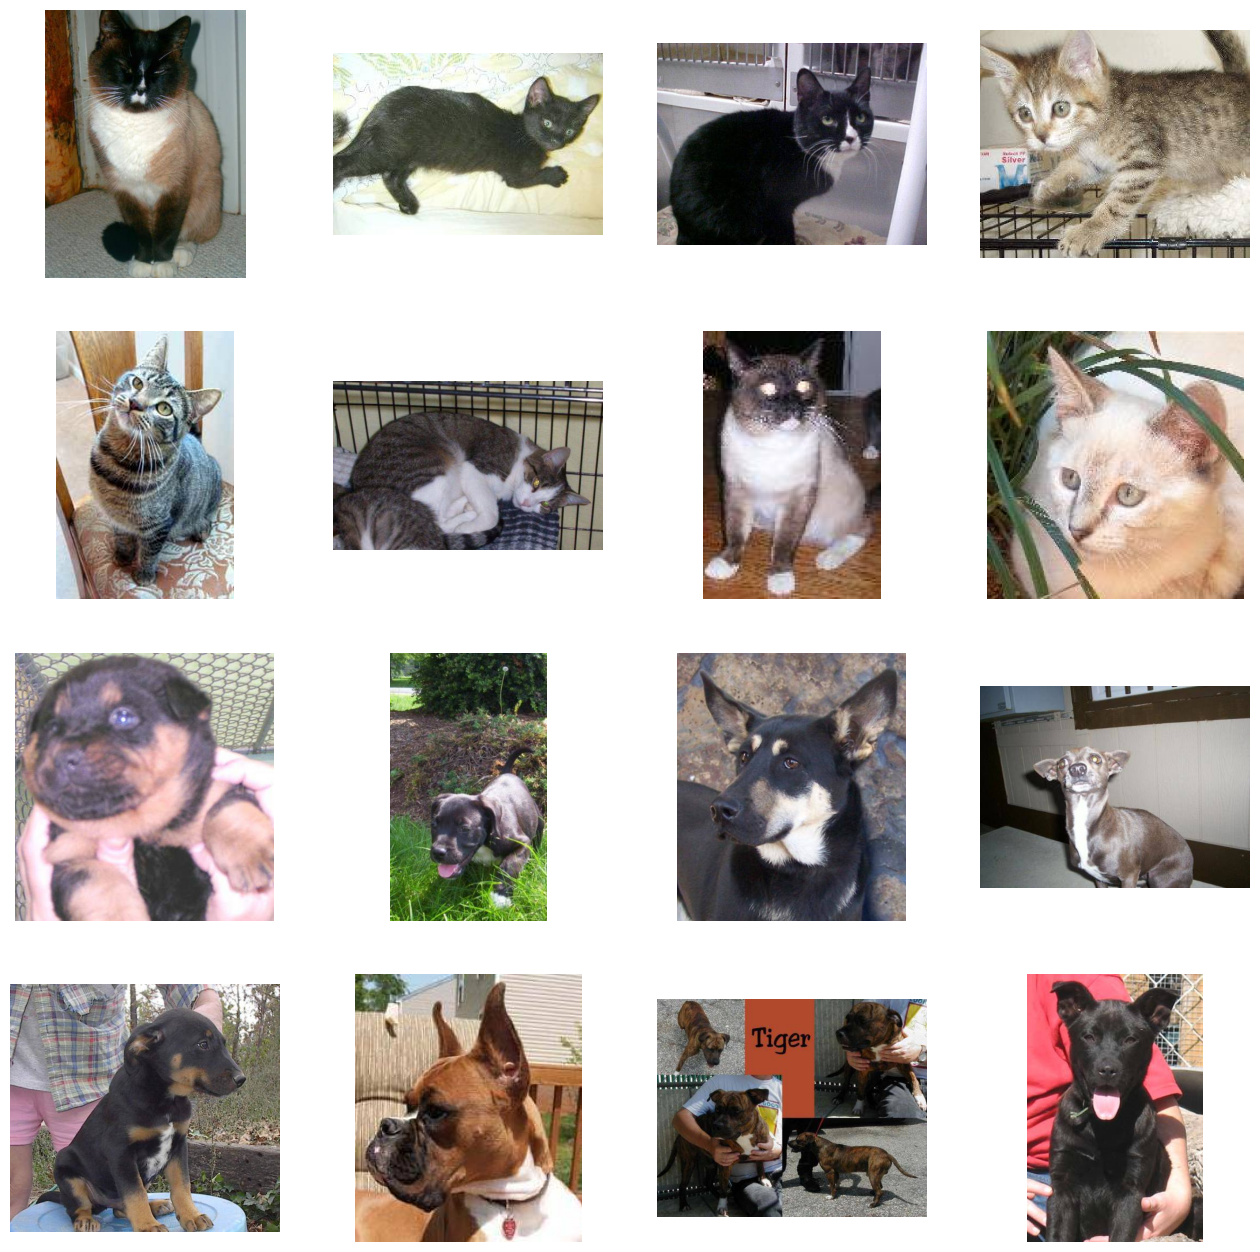

In [19]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_names[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [20]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-21 11:30:18--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  19.0MB/s    in 5.5s    

2024-06-21 11:30:25 (15.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [24]:
local_w = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [31]:
#### The instantiation of the pre_trained_model
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top = False,
                                weights = None)



In [32]:
pre_trained_model.load_weights(local_w)

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [33]:
for layer in pre_trained_model.layers:
  layer.trainable=False

In [34]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [36]:
last_layer = pre_trained_model.get_layer('mixed9')

In [39]:
last_output = last_layer.output
print(last_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 3, 3, 2048), dtype=tf.float32, name=None), name='mixed9/concat:0', description="created by layer 'mixed9'")


In [50]:
##### Building the Deep Neural Network

x = layers.Flatten()(last_output)

x= layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation='sigmoid')(x)



In [56]:
from tensorflow.keras import Model

In [57]:
model = Model(pre_trained_model.input,x)

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalization_94[0

In [65]:
from tensorflow.keras.optimizers import RMSprop, Adam

In [66]:
model.compile(
    optimizer=RMSprop(0.001),
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [59]:
###### Data Proprecessing and Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
### Instantiating the train and validation engine
train_instant = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

valid_instant = ImageDataGenerator(rescale=1/255)

### Image Preprocessing

train_engine = train_instant.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size =20,
    class_mode='binary'
)

valid_engine = valid_instant.flow_from_directory(
    valid_dir,
    target_size = (150,150),
    batch_size =20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [67]:
#### Fitting the image to the trained model


history = model.fit(
    train_engine,
    steps_per_epoch=100,
    epochs=20,
    validation_data = valid_engine,
    validation_steps=50,
    verbose=2
)

Epoch 1/20
100/100 - 27s - loss: 0.4431 - accuracy: 0.8845 - val_loss: 0.1580 - val_accuracy: 0.9460 - 27s/epoch - 269ms/step
Epoch 2/20
100/100 - 18s - loss: 0.2136 - accuracy: 0.9280 - val_loss: 0.0957 - val_accuracy: 0.9640 - 18s/epoch - 175ms/step
Epoch 3/20
100/100 - 20s - loss: 0.2000 - accuracy: 0.9270 - val_loss: 0.2081 - val_accuracy: 0.9410 - 20s/epoch - 202ms/step
Epoch 4/20
100/100 - 17s - loss: 0.1805 - accuracy: 0.9395 - val_loss: 0.1467 - val_accuracy: 0.9390 - 17s/epoch - 167ms/step
Epoch 5/20
100/100 - 16s - loss: 0.1566 - accuracy: 0.9440 - val_loss: 0.1036 - val_accuracy: 0.9610 - 16s/epoch - 162ms/step
Epoch 6/20
100/100 - 16s - loss: 0.1355 - accuracy: 0.9500 - val_loss: 0.1230 - val_accuracy: 0.9620 - 16s/epoch - 160ms/step
Epoch 7/20
100/100 - 19s - loss: 0.1423 - accuracy: 0.9480 - val_loss: 0.1129 - val_accuracy: 0.9650 - 19s/epoch - 194ms/step
Epoch 8/20
100/100 - 16s - loss: 0.1134 - accuracy: 0.9625 - val_loss: 0.0961 - val_accuracy: 0.9710 - 16s/epoch - 160

In [68]:
### Plotting a graph to evaluate the model performance

In [71]:
acc_train= history.history['accuracy']
acc_val= history.history['val_accuracy']

In [92]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epoch = range(len(acc_train))

In [88]:
epoch

range(0, 20)

In [84]:
sns.set_style('darkgrid')
%matplotlib inline

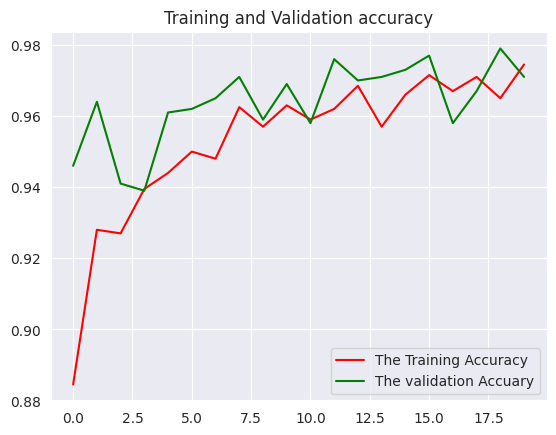

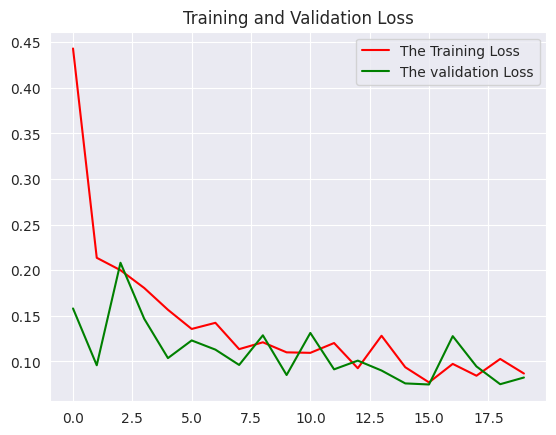

In [86]:
plt.plot(epoch,acc_train,'r',label='The Training Accuracy')
plt.plot(epoch,acc_val,'g',label='The validation Accuary')
plt.legend(loc=0)
plt.title("Training and Validation accuracy")

plt.show

plt.figure()

plt.plot(epoch,loss_train,'r',label='The Training Loss')
plt.plot(epoch,loss_val,'g',label='The validation Loss')
plt.legend(loc=1)
plt.title("Training and Validation Loss")

plt.show;

In [95]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving connie blog dog.jpg to connie blog dog.jpg
1/1 [==============================] - 0s 26ms/step
[1.]
connie blog dog.jpg is a dog
